# Information about the dataset

## The California Housing dataset contains housing data derived from the 1990 U.S. census. Each row in the dataset represents a district, and the columns represent various features related to housing.
## Features:
### 1. `longitude`: Longitude of the district.
### 2. `latitude`: Latitude of the district.
### 3. `housing_median_age`: Median age of the houses in the district.
### 4. `total_rooms`: Total number of rooms in the district.
### 5. `total_bedrooms`: Total number of bedrooms in the district.
### 6. `population`: Total population in the district.
### 7. `households`: Total number of households in the district.
### 8. `median_income`: Median income of households in the district.
### 9. `median_house_value`: Median house value for households in the district.
* The dataset can be found on [Kaggle](https://www.kaggle.com/datasets/harrywang/housing).

# 1. Import necessary libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import tarfile
from six.moves import urllib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 2. Load the Data

In [27]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [28]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [29]:
fetch_housing_data()

In [30]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


# 3. Explore the dataset

In [31]:
# Take a look at the dataset
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
# A quick description of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### All attributes are numerical, except the ocean_proximity is of type object.
* The values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute.
* Lets find out what categories exist and how many districts belong to each category.

In [33]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

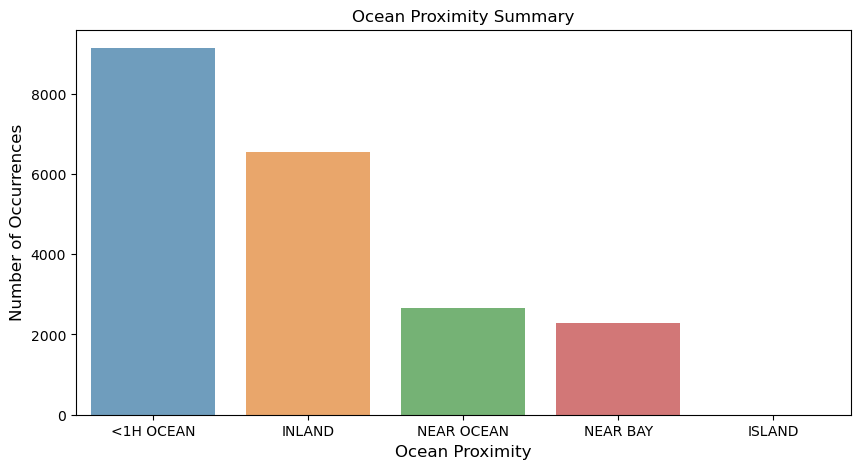

In [34]:
# Visualize the ocean_proximity attribute
op_count = housing['ocean_proximity'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=op_count.index, y=op_count.values, alpha=0.7)
plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()

In [35]:
# Take a look at the numerical attributes.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualize the numerical attributes we are working with.

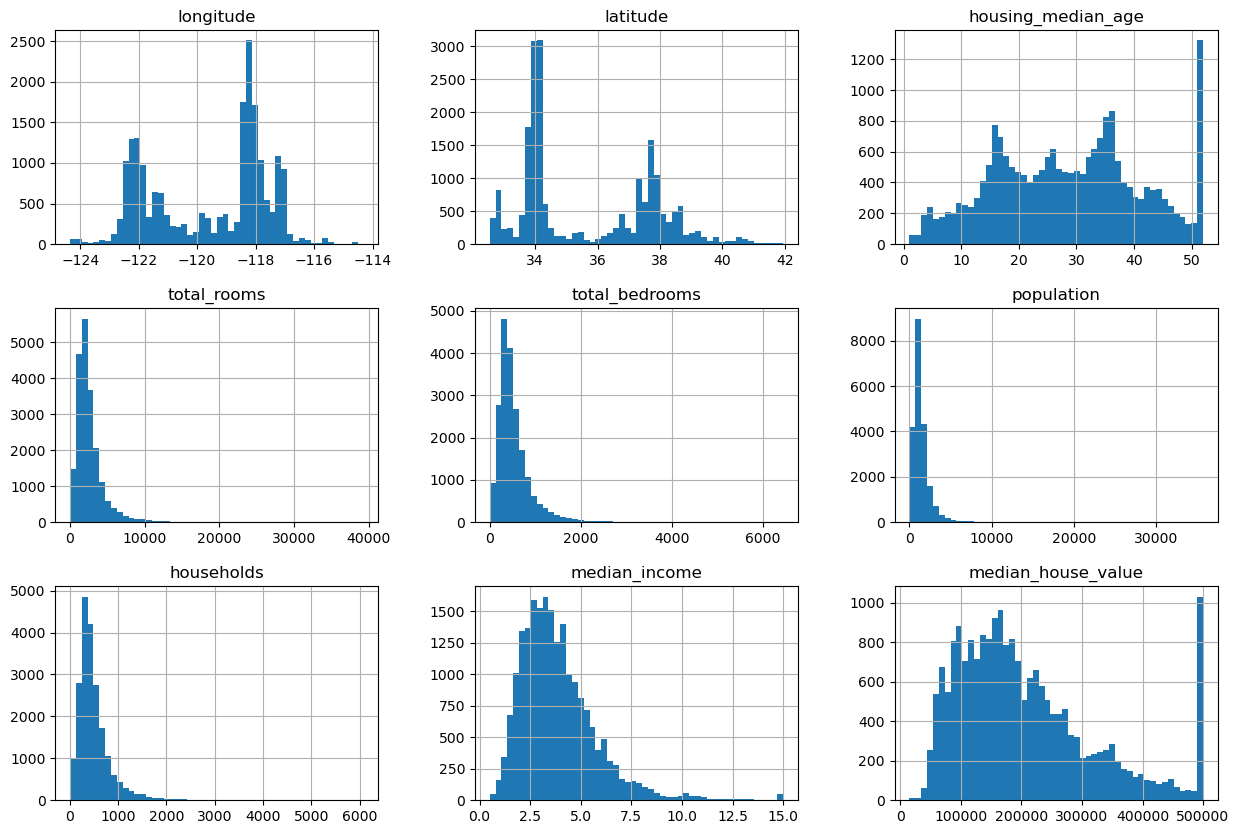

In [36]:
%matplotlib inline
housing.hist(bins=50, figsize=(15,10))
plt.show()


# 3. Preprocess the Data

#### From the data exploration step
* Total rooms and total bedrooms are in hundreds and thousands.
* Population is the total number of people in each district not in thousands or millions.
* Median income has been scaled and capped between 15.0001 (max) and 0.4999 (min).

## 3.1 Handle missing values


In [37]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [38]:
# Impute missing values in 'total_bedrooms' with the median
median_total_bedrooms = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


### 3.2 Encode Categorical Data

In [39]:
# One-hot encode the 'ocean_proximity' column
housing_encoded = pd.get_dummies(housing, columns=['ocean_proximity'])



In [40]:
housing_encoded.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [41]:
housing[housing_encoded.columns] = housing_encoded

In [42]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [43]:
# Reordering columns with 'median_house_value' as the last column
column_order = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income',
                'ocean_proximity', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
                'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
                'median_house_value']

# Reorder the DataFrame columns
housing = housing[column_order]

# Renaming the columns
new_column_names = {
    'ocean_proximity_<1H OCEAN': '<1H OCEAN',
    'ocean_proximity_INLAND': 'INLAND',
    'ocean_proximity_ISLAND': 'ISLAND',
    'ocean_proximity_NEAR BAY': 'NEAR BAY',
    'ocean_proximity_NEAR OCEAN': 'NEAR OCEAN'
}

housing.rename(columns=new_column_names, inplace=True)

In [44]:
# Drop the 'ocean_proximity' column
housing.drop(columns=['ocean_proximity'], inplace=True)

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


In [45]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0


## 6. Understanding the relationships between the variables and the target variable.


In [50]:
# Compute the correlation matrix
correlation_matrix = housing.corr()

# Display the correlation of each variable with the target variable 'median_house_value'
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending=False)
correlation_with_target


median_house_value     1.000000
median_income          0.688075
<1H OCEAN              0.256617
NEAR BAY               0.160284
rooms_per_household    0.151948
NEAR OCEAN             0.141862
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049457
ISLAND                 0.023416
population            -0.024650
longitude             -0.045967
latitude              -0.144160
INLAND                -0.484859
Name: median_house_value, dtype: float64

<Axes: >

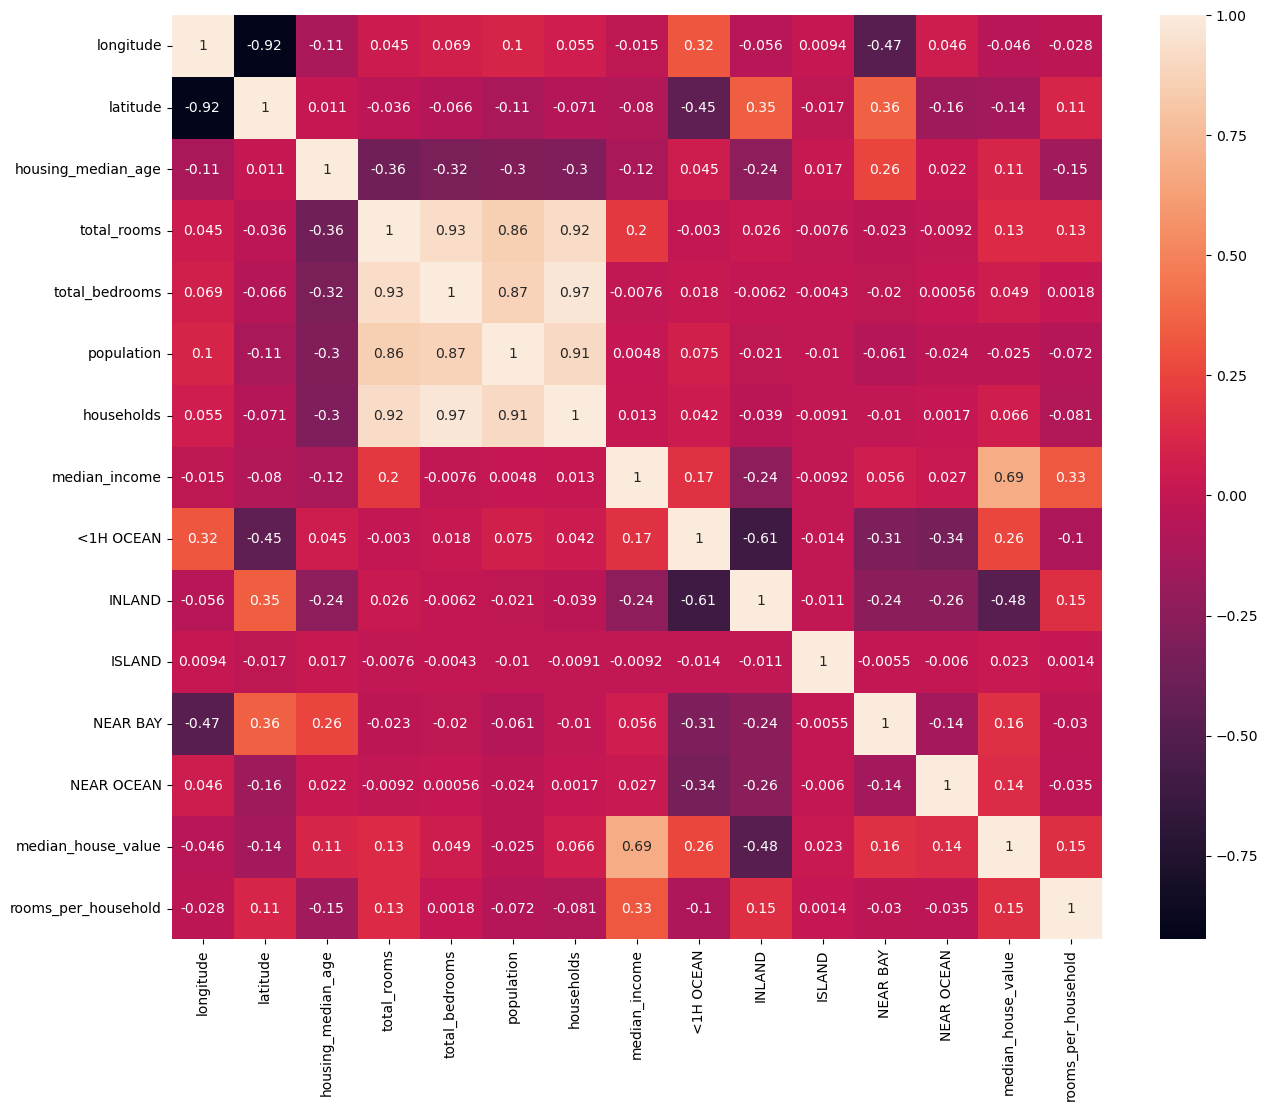

In [51]:
# Visualize the correlation of each variable with the target variable 'median_house_value'
plt.figure(figsize=(15,12))
sns.heatmap(housing.corr(), annot=True)

In [65]:
# Create new features
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

# Update the correlation matrix with new features
correlation_matrix = housing.corr()

# Display the correlation of each variable with the target variable 'median_house_value'
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending=False)
correlation_with_target


median_house_value          1.000000
median_income               0.688075
<1H OCEAN                   0.256617
NEAR BAY                    0.160284
NEAR OCEAN                  0.141862
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
ISLAND                      0.023416
rooms_per_household         0.018940
bedrooms_per_room          -0.002582
population_per_household   -0.003974
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
INLAND                     -0.484859
Name: median_house_value, dtype: float64

# 7. Split the Data into Training and Testing Sets

In [66]:
# Separate features (X) and target variable (y)
X = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 8. Standardize the features

In [73]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 9. Train the KNN Regressor Model

In [74]:
# Initialize the KNN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=9)

# Train the model
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test_scaled)


# 10. Evaluate the Model

In [75]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 3704752726.82
R-squared: 0.72


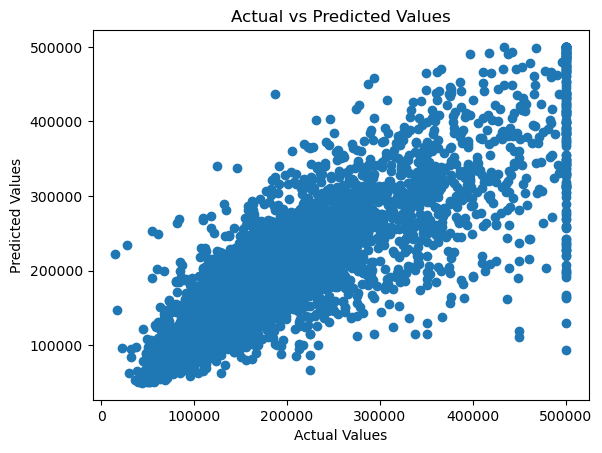

In [76]:
# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
